# Homework 3 - Problem 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

# Parts (a & b)

In [2]:
%%bash
mpirun -n 1 hmwk3_2c -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2c.csv

iterations: 24491
residual: 9.99457e-11
error: 0.000301183
cells: 128


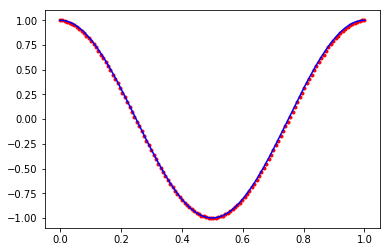

In [3]:
A = np.genfromtxt('hmwk3_2c.csv', delimiter=',')
print("iterations: %d" % A[-3])
print("residual: %g" % A[-2])
print("error: %g" % A[-1])
A = A[:-3]
print("cells: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [4]:
%%bash
mpirun -n 1 hmwk3_2n -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2n.csv

iterations: 24493
residual: 9.99518e-11
error: 0.000401478
nodes: 129


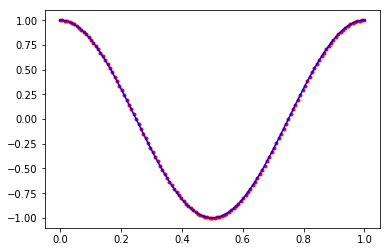

In [5]:
A = np.genfromtxt('hmwk3_2n.csv', delimiter=',')
print("iterations: %d" % A[-3])
print("residual: %g" % A[-2])
print("error: %g" % A[-1])
A = A[:-3]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [6]:
%%bash
mpirun -n 1 hmwk3_2c -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2c_1.csv

In [7]:
%%bash
mpirun -n 2 hmwk3_2c -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2c_2.csv

In [8]:
%%bash
mpirun -n 4 hmwk3_2c -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2c_4.csv

In [9]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [1,2,4]:    
    A = np.genfromtxt('hmwk3_2c_' + str(n) +'.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

   Processes  iterations      residual     error
1        1.0     24491.0  9.994566e-11  0.000301
2        2.0        64.0  0.000000e+00  0.000000
4        4.0      1945.0  9.984334e-11  0.968655


In [10]:
%%bash
mpirun -n 1 hmwk3_2n -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2n_1.csv

In [11]:
%%bash
mpirun -n 2 hmwk3_2n -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2n_2.csv

In [12]:
%%bash
mpirun -n 4 hmwk3_2n -n 128 --itermax 100000 --tol 1e-10 > hmwk3_2n_4.csv

In [13]:
data = {}
columns = ['Processes', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [1,2,4]:    
    A = np.genfromtxt('hmwk3_2n_' + str(n) +'.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    
    
    data_row = {'Processes': n, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)

   Processes  iterations      residual     error
1        1.0     24493.0  9.995176e-11  0.000401
2        2.0      6864.0  9.984119e-11  0.984369
4        4.0      1887.0  9.976262e-11  0.968744


# Part (c)

In [14]:
%%bash
mpirun -n 1 hmwk3_2c -n 32 --itermax 10000000 --tol 1e-10 > hmwk3_2c_N32.csv

In [15]:
%%bash
mpirun -n 1 hmwk3_2c -n 64 --itermax 10000000 --tol 1e-10 > hmwk3_2c_N64.csv

In [16]:
%%bash
mpirun -n 1 hmwk3_2c -n 128 --itermax 10000000 --tol 1e-10 > hmwk3_2c_N128.csv

In [17]:
%%bash
mpirun -n 1 hmwk3_2c -n 256 --itermax 10000000 --tol 1e-10 > hmwk3_2c_N256.csv

In [18]:
%%bash
mpirun -n 1 hmwk3_2c -n 512 --itermax 1000000000 --tol 1e-10 > hmwk3_2c_N512.csv

In [19]:
%%bash
mpirun -n 1 hmwk3_2c -n 1024 --itermax 1000000000 --tol 1e-10 > hmwk3_2c_N1024.csv

           N  iterations      residual     error
32      32.0      3487.0  9.969658e-11  0.004815
64      64.0     12816.0  9.990297e-11  0.001205
128    128.0     46678.0  9.999701e-11  0.000301
256    256.0    168320.0  9.999890e-11  0.000075
512    512.0    599655.0  9.999979e-11  0.000019
1024  1024.0   2104071.0  9.999990e-11  0.000020


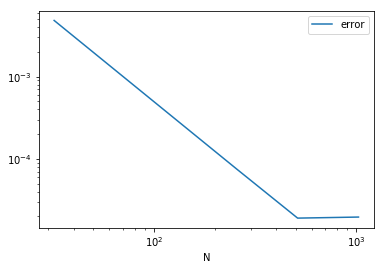

In [20]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [32,64,128,256,512,1024]:    
    A = np.genfromtxt('hmwk3_1c_N' + str(n) + '.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    
    data_row = {'N': (n), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)
df.plot(x='N', y='error', loglog=True)

In [21]:
%%bash
mpirun -n 1 hmwk3_2n -n 32 --itermax 10000000 --tol 1e-10 > hmwk3_2n_N32.csv

In [22]:
%%bash
mpirun -n 1 hmwk3_2n -n 64 --itermax 10000000 --tol 1e-10 > hmwk3_2n_N64.csv

In [23]:
%%bash
mpirun -n 1 hmwk3_2n -n 128 --itermax 10000000 --tol 1e-10 > hmwk3_2n_N128.csv

In [24]:
%%bash
mpirun -n 1 hmwk3_2n -n 256 --itermax 10000000 --tol 1e-10 > hmwk3_2n_N256.csv

In [25]:
%%bash
mpirun -n 1 hmwk3_2n -n 512 --itermax 1000000000 --tol 1e-10 > hmwk3_2n_N512.csv

In [26]:
%%bash
mpirun -n 1 hmwk3_2n -n 1024 --itermax 1000000000 --tol 1e-10 > hmwk3_2n_N1024.csv

           N  iterations      residual     error
32      32.0      1818.0  9.953100e-11  0.006438
64      64.0      6698.0  9.995121e-11  0.001607
128    128.0     24493.0  9.995176e-11  0.000401
256    256.0     88766.0  9.998733e-11  0.000100
512    512.0    318241.0  9.999830e-11  0.000022
1024  1024.0   1125679.0  9.999939e-11  0.000004


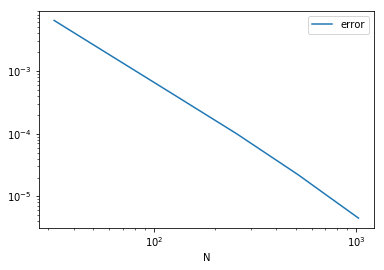

In [27]:
data = {}
columns = ['N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)
for n in [32,64,128,256,512,1024]:    
    A = np.genfromtxt('hmwk3_2n_N' + str(n) + '.csv', delimiter=',')
    iterations = A[-3]
    residual = A[-2]
    error = A[-1]
    A = A[:-3]
    
    data_row = {'N': (n), 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(n)))
print(df)
df.plot(x='N', y='error', loglog=True)